# KNN

- consume mucha memoria
- no va bien con datos con muchas dimensiones
- no va bien con variables categóricas

### Es bueno por:

- Simple
- Se pueden utilizar muchas clases 
- Muy facil añadir parametros
- pocos parametros

In [1]:
# es un algoritmo de clasificacion
# predice la etiqueta utilizando vecinos próximos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
iris= sb.load_dataset('iris')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# vamos a utilizar los datos de iris para predecir la especie
#quitamos la columna especie
X= iris.drop ('species', axis=1)
y=iris[['species']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=33)

In [8]:
# importamos el KNN
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn= KNeighborsClassifier(n_neighbors=1)

In [30]:
knn.fit (X_train,y_train)

c:\users\sergio\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=13)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
#creamos predicciones
pred= knn.predict (X_test)

In [33]:
report= classification_report(y_test, pred)

In [34]:
confusion_matrix(y_test,pred)

array([[11,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 19]], dtype=int64)

In [35]:
11+15+18

44

In [36]:
44/45
#exactitud de:

0.9777777777777777

In [37]:
 knn.score(X_test,y_test)

1.0

In [38]:
#podemos ver la puntuacion de los datos train
knn.score(X_train,y_train)

0.9714285714285714

### como escoger numero de K, crear bucle para probar diferente numeros de K ye scoger la que mejor vaya

In [19]:
# escogiendo numero de Ks

In [20]:
vecinos= np.arange(1,20)

In [21]:
vecinos

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [22]:
# crear una matriz vacía con la logitud de "vecinos"
train_exactitud= np.empty(len(vecinos))

In [23]:
test_exactitud= np.empty(len(vecinos))

In [24]:
# ahora creamos un bucle para probar diferentes valores de K

In [25]:
for i, k in enumerate (vecinos):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_exactitud[i]= knn.score(X_train,y_train)
    test_exactitud[i]= knn.score(X_test,y_test)

c:\users\sergio\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\sergio\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\sergio\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\sergio\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:198: 

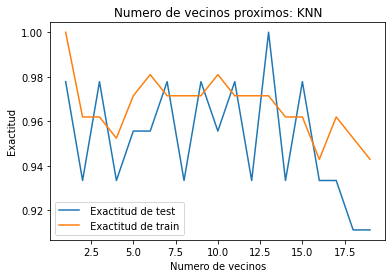

In [26]:
plt.title('Numero de vecinos proximos: KNN')
plt.plot (vecinos,test_exactitud,label=' Exactitud de test')
plt.plot (vecinos,train_exactitud,label=' Exactitud de train')
plt.legend()
plt.xlabel('Numero de vecinos')
plt.ylabel('Exactitud')
plt.show()

In [27]:
#usariamos el test mas alto "aqui" encima justo

In [28]:
# si cambiasemos el randomstate cambia el grafico completamente.. dependiendo de donde escoje el random y donde hace el 
#split